In [6]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2
import matplotlib.pyplot as plt

feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

[[ 9387 35113 10050  3546  4365  2052]]
User given Image : 


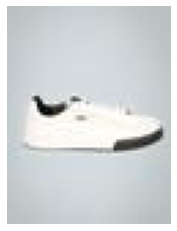

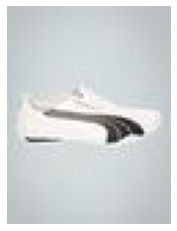

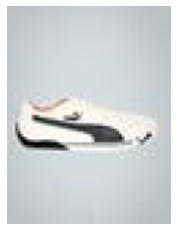

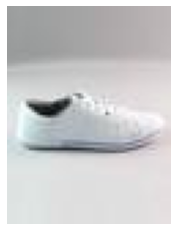

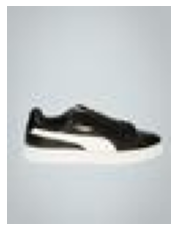

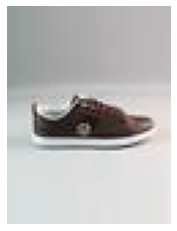

In [13]:
img = image.load_img('test/shoe.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

print("User given Image : ")
for file in indices[0][0:6]:
    plt.axis('off')
    
    temp_img = cv2.imread(filenames[file])
    resized_img = cv2.resize(temp_img, (180, 180))

    # Display the image
    plt.imshow(temp_img)
    plt.show()

[[40887 43633 12659 26767  8126 33378]]


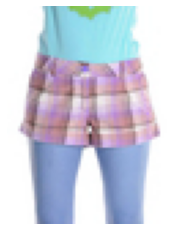

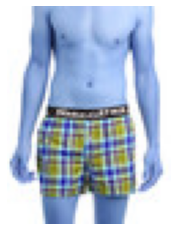

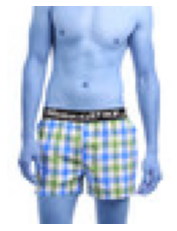

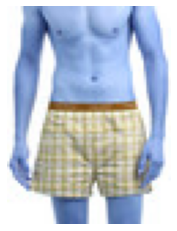

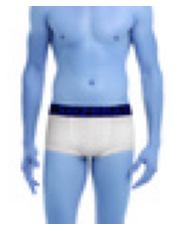

In [9]:
img = image.load_img('test/shorts.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

for file in indices[0][1:6]:
    plt.axis('off')
    
    temp_img = cv2.imread(filenames[file])
    resized_img = cv2.resize(temp_img, (180, 180))

    # Display the image
    plt.imshow(temp_img)
    plt.show()